In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as MSE
from scipy.stats import pearsonr

# Read data

In [9]:
data = pd.read_csv('../data/train_test_data.csv')
data.validation.value_counts()

train    3429
test      890
check     235
other     201
Name: validation, dtype: int64

# Common info

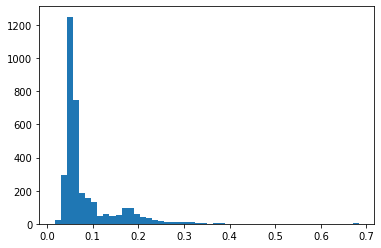

In [10]:
plt.hist(data[data.validation == 'train'].y, bins=50)
plt.show()

## Features

In [11]:
features = [f for f in data.columns if f not in ['id', 'y', 'year', 'galaxy', 'pred', 
                                                 'galactic_year', 'validation', 'test_min_year']]

In [12]:
data[features].dtypes.value_counts()

float64    77
int64       1
dtype: int64

In [13]:
data[features].isna().sum()/len(data)

Adjusted_net_savings                                                     0.699054
Adolescent_birth_rate_births_per_1_000_female_creatures_ages_15_19       0.608412
Creature_Immunodeficiency_Disease_prevalence_adult__ages_15_49__total    0.700736
Current_health_expenditure__of_GGP                                       0.690221
Domestic_credit_provided_by_financial_sector__of_GGP                     0.653417
                                                                           ...   
Young_age_0_14_dependency_ratio_per_100_creatures_ages_15_64             0.605889
Youth_unemployment_rate_female_to_male_ratio                             0.612829
existence_expectancy_at_birth                                            0.001262
existence_expectancy_index                                               0.001262
min_test_year                                                            0.000000
Length: 78, dtype: float64

## Correlations with target

In [14]:
train = data[data.validation == 'train']
test = data[data.validation == 'test'] 
corrs = []
for f in features:
    corrs.append([f, pearsonr(train.y, train[f].fillna(train[f].mean()))[0], 
                  train[f].isna().sum()/len(train), test[f].isna().sum()/len(test)])
    
corrs = pd.DataFrame(sorted(corrs, key=lambda x: abs(x[1]), reverse=True), 
                     columns=['feature', 'corr', 'nans train', 'nans_test'])
corrs.head(15)

feature      corr  nans train  \
0           Intergalactic_Development_Index_IDI__Rank -0.679389    0.121027   
1                 Intergalactic_Development_Index_IDI  0.629603    0.109361   
2                                     Education_Index  0.628050    0.109361   
3          Expected_years_of_education_galactic_years  0.611500    0.034121   
4              Mean_years_of_education_galactic_years  0.592109    0.102654   
5                                        Income_Index  0.582708    0.008166   
6                       existence_expectancy_at_birth  0.570965    0.000000   
7                          existence_expectancy_index  0.567322    0.000000   
8                             Gross_income_per_capita  0.483626    0.008166   
9                         Gender_Inequality_Index_GII -0.412495    0.828230   
10  Old_age_dependency_ratio_old_age_65_and_older_...  0.410244    0.720910   
11  Population_using_at_least_basic_sanitation_ser...  0.394120    0.514727   
12     Intergalactic_Development_Index_IDI__male_Rank -0.373142    0.818023   
13   Intergalactic_Development_Index_IDI__female_Rank -0.368611    0.817731   
14   Interstellar_Data_Net_users_total__of_population  0.361073    0.828521   

    nans_test  
0    0.011236  
1    0.008989  
2    0.008989  
3    0.005618  
4    0.008989  
5    0.005618  
6    0.005618  
7    0.005618  
8    0.005618  
9    0.405618  
10   0.314607  
11   0.011236  
12   0.383146  
13   0.383146  
14   0.322472

In [15]:
test[test['id'] == 1].head()

Adjusted_net_savings  \
3743                   NaN   

      Adolescent_birth_rate_births_per_1_000_female_creatures_ages_15_19  \
3743                                                NaN                    

      Creature_Immunodeficiency_Disease_prevalence_adult__ages_15_49__total  \
3743                                                NaN                       

      Current_health_expenditure__of_GGP  \
3743                                 NaN   

      Domestic_credit_provided_by_financial_sector__of_GGP  Education_Index  \
3743                                                NaN            0.409969   

      Employment_in_agriculture__of_total_employment  \
3743                                             NaN   

      Employment_in_services__of_total_employment  \
3743                                          NaN   

      Employment_to_population_ratio__ages_15_and_older  \
3743                                                NaN   

      Estimated_gross_galactic_income_per_capita_female  ...  \
3743                                                NaN  ...   

      Youth_unemployment_rate_female_to_male_ratio  \
3743                                           NaN   

      existence_expectancy_at_birth  existence_expectancy_index  \
3743                      57.228262                    0.529835   

      galactic_year         galaxy  id    y  year  min_test_year  validation  
3743        1007012  Reticulum III   1 -1.0    18             18        test  

[1 rows x 84 columns]

# Scatterplots

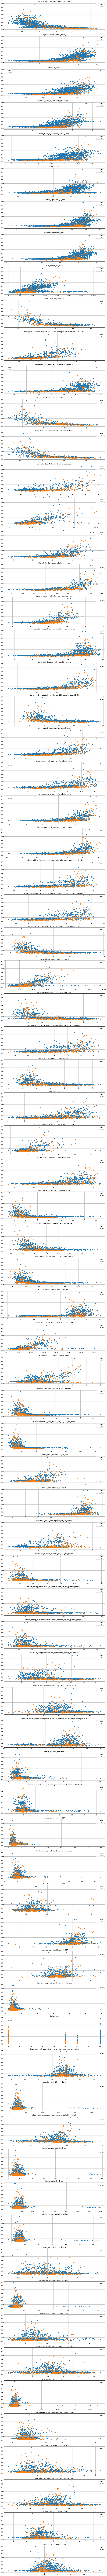

In [46]:
fig, ax = plt.subplots(len(features), figsize=(15, 5*len(features)))

for i, f in enumerate(corrs.feature):
    ax[i].scatter(train[f], train['y'], label='train')
    ax[i].scatter(check[f], check['y'], label='check')
    ax[i].grid()
    
    ax[i].legend()
    ax[i].set_title(f)
    
plt.show()

# Pairwise correlations

In [88]:
corr_matrix = data.corr()
corr_matrix[corr_matrix.apply(abs) > 0.5]

Adjusted_net_savings  \
Adjusted_net_savings                                                 1.0   
Adolescent_birth_rate_births_per_1_000_female_c...                   NaN   
Creature_Immunodeficiency_Disease_prevalence_ad...                   NaN   
Current_health_expenditure__of_GGP                                   NaN   
Domestic_credit_provided_by_financial_sector__o...                   NaN   
...                                                                  ...   
id                                                                   NaN   
y                                                                    NaN   
year                                                                 NaN   
min_test_year                                                        NaN   
pred                                                                 NaN   

                                                    Adolescent_birth_rate_births_per_1_000_female_creatures_ages_15_19  \
Adjusted_net_savings                                                                              NaN                    
Adolescent_birth_rate_births_per_1_000_female_c...                                            1.00000                    
Creature_Immunodeficiency_Disease_prevalence_ad...                                                NaN                    
Current_health_expenditure__of_GGP                                                                NaN                    
Domestic_credit_provided_by_financial_sector__o...                                                NaN                    
...                                                                                               ...                    
id                                                                                                NaN                    
y                                                                                                 NaN                    
year                                                                                              NaN                    
min_test_year                                                                                     NaN                    
pred                                                                                         -0.55936                    

                                                    Creature_Immunodeficiency_Disease_prevalence_adult__ages_15_49__total  \
Adjusted_net_savings                                                                              NaN                       
Adolescent_birth_rate_births_per_1_000_female_c...                                                NaN                       
Creature_Immunodeficiency_Disease_prevalence_ad...                                                1.0                       
Current_health_expenditure__of_GGP                                                                NaN                       
Domestic_credit_provided_by_financial_sector__o...                                                NaN                       
...                                                                                               ...                       
id                                                                                                NaN                       
y                                                                                                 NaN                       
year                                                                                              NaN                       
min_test_year                                                                                     NaN                       
pred                                                                                              NaN                       

                                                    Current_health_expenditure__of_GGP  \
Adjusted_net_savings                                                               

## Time series for galaxies

In [16]:
data.year.nunique()

27

In [17]:
galaxies = list(set(train.galaxy))

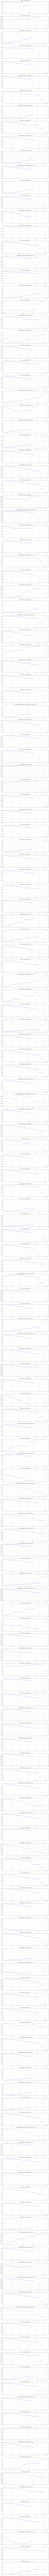

In [27]:
fig, ax = plt.subplots(len(galaxies), figsize=(15, 5*len(galaxies)))

for i, g in enumerate(galaxies):
    ts = pd.DataFrame(data.loc[data.galaxy == g, ['year', 'min_test_year', 'validation', 'y']])
    #if ts[ts.validation == 'check'].shape[0] > 0:
    #    check_rmse = round(np.sqrt(MSE(ts[ts.validation == 'check'].y, 
    #                             ts[ts.validation == 'check'].pred)), 4)
    #else:
    #    check_rmse = -1
                       
    ax[i].scatter(ts[ts.validation == 'train'].year, (ts[ts.validation == 'train'].y), color='blue')
    ax[i].scatter(ts[ts.validation == 'check'].year, (ts[ts.validation == 'check'].y), color='red')
    ax[i].grid()
    ax[i].set_title(g + '; min_test_year =' + str(ts.min_test_year.iloc[0]))
    
plt.show()

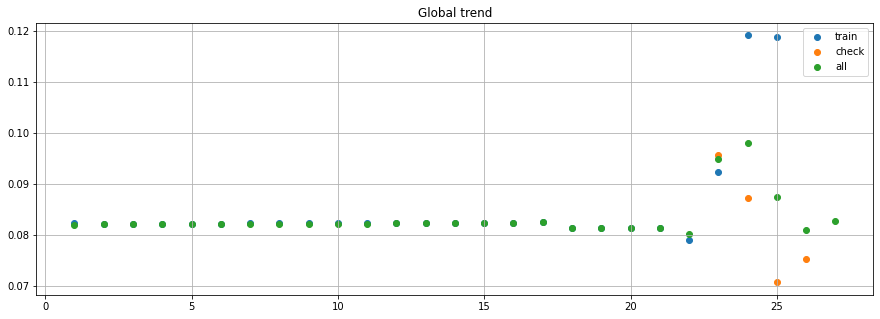

In [38]:
plt.figure(figsize=(15, 5))
global_ts_train = data[data.validation == 'train']\
    .groupby('year').y.agg('mean').reset_index()
global_ts_train.columns = ['year', 'mean_y']

global_ts_check = data[data.validation == 'check']\
    .groupby('year').y.agg('mean').reset_index()
global_ts_check.columns = ['year', 'mean_y']

global_ts = data[data.validation != 'test'].groupby('year').y.agg('mean').reset_index()
global_ts.columns = ['year', 'mean_y']
global_ts = global_ts.append(pd.DataFrame([[27., data[data.validation != 'test'].y.mean()]], 
                                          columns=global_ts.columns))

data['mean_y_year'] = data.year.map(pd.Series(global_ts.mean_y.values, 
                                              index=global_ts.year))

plt.scatter(global_ts_train.year, global_ts_train.mean_y, label='train')
plt.scatter(global_ts_check.year, global_ts_check.mean_y, label='check')
plt.scatter(global_ts.year, global_ts.mean_y, label='all')

plt.legend()
plt.grid()
plt.title('Global trend')
plt.show()